<a href="https://colab.research.google.com/github/SandileMbatha/COMP721Project1/blob/main/matchPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NBA_dataset/team_season.xlsx')
df = df[df['year'] < 2003]
df

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.000000,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.000000,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.000000,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.000000,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.000000,33,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,SAS,2002,N,2908,6297,1591,2194,939,2556,3495,1636,1672,629,1260,529,449,1270,7856,2862,6703,1334,1737,1029,2322,3351,1559,1914,665,1177,422,354,1043,7412,91.857811,60,22
1124,SEA,2002,N,2887,6599,1325,1780,963,2385,3348,1775,1713,679,1026,295,456,1291,7555,2871,6424,1351,1821,938,2462,3400,1703,1671,500,1158,410,472,1371,7565,89.995102,40,42
1125,TOR,2002,N,2847,6664,1350,1879,1023,2355,3378,1583,1761,609,1106,392,409,1193,7453,3037,6592,1490,1964,976,2601,3577,1729,1701,604,1079,403,370,986,7934,91.460609,24,58
1126,UTA,2002,N,2894,6189,1750,2349,1021,2381,3402,2103,1837,708,1304,467,224,641,7762,2751,6346,1627,2143,1011,2120,3131,1601,1950,723,1253,429,437,1251,7566,90.877747,47,35


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prepare x and y

feature_cols = ['o_fgm','o_fga','o_ftm','o_fta','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_3pm','o_3pa','o_pts','d_fgm','d_fga','d_ftm','d_fta','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_3pm','d_3pa','d_pts','pace','lost']
               
X = df[feature_cols]
y = df['team']
#x = X.replace(0, df.mean())
y


0       BOS
1       CH1
2       CL1
3       DE1
4       NYK
       ... 
1123    SAS
1124    SEA
1125    TOR
1126    UTA
1127    WAS
Name: team, Length: 1128, dtype: object

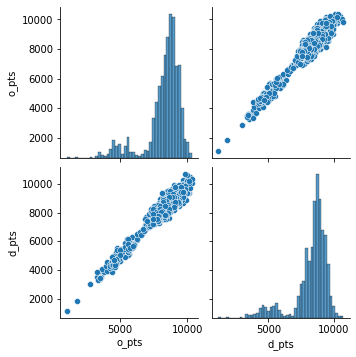

In [ ]:
feature_col = ['team','o_pts','d_pts']
sns.pairplot(df[feature_col], size=2.5)
plt.show()

In [ ]:
#train test split, standardize data

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

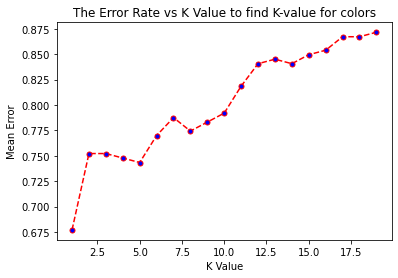

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    #pred_i=pred_i.reshape(len(y_test),1)
    error.append(np.mean(pred_i != y_test))
   
plt.title('The Error Rate vs K Value to find K-value for colors')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='.',
         markerfacecolor='blue', markersize=10)
plt.savefig('Error_rate_vs_K_for_c_only.png')
plt.show()


In [ ]:
#knn 

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

0.23008849557522124
[[0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16666667 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
#linear svm

clf = LinearSVC(random_state=2)
clf.fit(x_train, y_train)
#print(clf.coef_)
#print(clf.intercept_)
pred = (clf.predict(x_test))
print("Prediction ",pred)
print("Accuracy ",metrics.accuracy_score(y_test, pred))

Prediction  ['CLE' 'GSW' 'CLE' 'TOR' 'WA1' 'LAL' 'HOU' 'PHO' 'DAL' 'PHO' 'BOS' 'SYR'
 'DEN' 'PHO' 'BOS' 'BOS' 'PHO' 'SDC' 'PHO' 'MIL' 'NYK' 'SAS' 'LAC' 'CLE'
 'SAS' 'NJN' 'MIL' 'CHI' 'DAL' 'HOU' 'DEN' 'PHI' 'POR' 'POR' 'POR' 'LAC'
 'POR' 'NJN' 'BOS' 'LAL' 'CIN' 'NOB' 'BOS' 'ATL' 'HOU' 'GSW' 'KEN' 'NYK'
 'BOS' 'LAL' 'BUF' 'DAL' 'BOS' 'DAL' 'POR' 'UTA' 'MIL' 'LAL' 'PRO' 'GSW'
 'NYK' 'POR' 'SYR' 'CAR' 'MIN' 'DAL' 'HOU' 'UTA' 'WA1' 'NYK' 'STL' 'NYK'
 'VAN' 'PHI' 'SDC' 'MIL' 'KEN' 'MIA' 'VIR' 'SYR' 'BOS' 'CHI' 'LAC' 'POR'
 'CIN' 'CLE' 'CIN' 'MIN' 'CLE' 'MIL' 'LAL' 'UTS' 'UTA' 'SYR' 'CH1' 'BAL'
 'MIA' 'CLE' 'SAS' 'CHA' 'WAS' 'PHO' 'CLE' 'UTS' 'CIN' 'KCK' 'KEN' 'CLE'
 'NYK' 'ATL' 'HOU' 'DEN' 'DLC' 'SEA' 'CIN' 'HOU' 'NYK' 'UTA' 'KCK' 'NYK'
 'UTA' 'NYK' 'WA1' 'BOS' 'WSC' 'PHO' 'GSW' 'MIL' 'MIL' 'PH1' 'KCK' 'DET'
 'UTA' 'DET' 'CLE' 'LAC' 'GSW' 'CHA' 'DET' 'BUF' 'NYK' 'UTA' 'DEN' 'NOJ'
 'PH1' 'VIR' 'NYK' 'BUF' 'MIA' 'SAS' 'ATL' 'PH1' 'NJN' 'BOS' 'NJN' 'BOS'
 'PHI' 'UTA' 'LAL' 'UTA' 'PHI' 'PHO' 'C

In [ ]:
#random forrest classifier

clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(clf1.feature_importances_)

[0.04953746 0.05049896 0.04913112 0.0451382  0.02569367 0.02385328
 0.04626197 0.05294241 0.04897815 0.02592535 0.02209068 0.02983265
 0.02655211 0.00510052 0.04807048 0.02765425 0.02747805 0.02939302
 0.02984706 0.02329068 0.0234281  0.03041709 0.03243627 0.03139443
 0.02533195 0.02356676 0.02412422 0.00410287 0.04784493 0.02102693
 0.04905638]


In [ ]:
pred = clf1.predict(x_test)
print(pred)
print(clf1.predict(x_test))
print(metrics.accuracy_score(y_test, pred))

['DET' 'IND' 'PHI' 'LAC' 'CHI' 'SAC' 'GSW' 'LAL' 'MIL' 'GSW' 'PHO' 'PH1'
 'ATL' 'SAS' 'NYK' 'CHI' 'MIL' 'GSW' 'SEA' 'LAL' 'DET' 'LAL' 'MIA' 'ATL'
 'SAS' 'NJN' 'SEA' 'HOU' 'DEN' 'BOS' 'DEN' 'PHI' 'UTA' 'CHI' 'POR' 'LAC'
 'POR' 'MIA' 'PHO' 'PHO' 'CIN' 'DEN' 'POR' 'WA1' 'ATL' 'POR' 'NYN' 'ATL'
 'HOU' 'CLE' 'PHI' 'DAL' 'CH1' 'DEN' 'GSW' 'LAL' 'SEA' 'PHI' 'BOS' 'CLE'
 'CLE' 'CHI' 'SYR' 'CAR' 'MIL' 'PHO' 'CHI' 'DET' 'ATL' 'GSW' 'BOS' 'WA1'
 'GSW' 'NJN' 'GSW' 'NYK' 'IND' 'CHI' 'VIR' 'FTW' 'BOS' 'MIL' 'LAC' 'HOU'
 'CIN' 'CHI' 'MIL' 'DAL' 'CLE' 'SEA' 'LAL' 'UTS' 'PHI' 'STL' 'FTW' 'BAL'
 'SAC' 'NYK' 'DET' 'CHI' 'CHI' 'WA1' 'SAS' 'ST1' 'DET' 'BUF' 'IND' 'DET'
 'DET' 'ATL' 'CLE' 'DEN' 'DLC' 'CLE' 'CIN' 'HOU' 'SEA' 'PHO' 'ATL' 'BA1'
 'UTA' 'KCK' 'IND' 'BA1' 'WSC' 'BAL' 'PHI' 'WA1' 'GSW' 'SYR' 'PHO' 'DET'
 'MIN' 'GSW' 'LAC' 'PHI' 'GSW' 'DET' 'DET' 'SEA' 'WA1' 'UTA' 'PHO' 'NOJ'
 'ROC' 'NYN' 'DET' 'CLE' 'CLE' 'SAS' 'GSW' 'FTW' 'HOU' 'BA1' 'NYK' 'HOU'
 'PHI' 'CLE' 'LAL' 'UTA' 'CHI' 'PHO' 'CHA' 'DET' 'M

In [ ]:
#games
games = ['PHX1 vs SAS2', 'DET1 vs PHI2', 'MIN1 vs BOS2', 'NY1 vs MIA2', 'TOR1 vs MIL2', 'CHI1 vs DAL2', 'UTA1 vs DEN2', 'WSH1 vs MEM2', 'ATL1 vs POR2', 'CHA1 vs LAL2']

g1 = [[101.3, 111.9, 22.3, 15.9, 11.3, 87.1, 108.4, 106.7, 18.7, 14.4, 10.3, 86.0,103.4, 109.8, 18.0, 13.2, 10.3, 84.8, 102.2, 108.0, 20.8, 15.3, 10.8, 86.0,105.9, 105.4, 22.1, 13.9, 9.4, 86.5,20.1]]
g2 = [[108.4, 106.7, 18.7, 14.4, 10.3, 86.0]]
g3 = [[103.4, 109.8, 18.0, 13.2, 10.3, 84.8]]
g4 = [[102.2, 108.0, 20.8, 15.3, 10.8, 86.0]]
g5 = [[105.9, 105.4, 22.1, 13.9, 9.4, 86.5]]
g6 = [[101.6, 108.7, 19.2, 13.8, 9.4, 88.6]]
g7 = [[107.9, 106.8, 20.1, 14.4, 8.4, 82.4]]
g8 = [[98.9, 106.4, 21.7, 13.7, 9.9, 86.1]]
g9 = [[102.5, 110.9, 19.7, 15.5, 9.5, 84.7]]
g10 = [[106.7, 107.4, 18.1, 13.1, 10.5, 86.4]]

In [ ]:
pred1 = clf1.predict(g1)
clf1.predict_proba(g1)


print(pred1)
print("**************************************************************************")
print(clf1.predict_proba(g1))

['DEN']
**************************************************************************
[[0.   0.01 0.   0.   0.06 0.01 0.   0.   0.   0.   0.   0.   0.   0.
  0.04 0.   0.31 0.   0.   0.   0.   0.   0.11 0.   0.   0.   0.   0.
  0.   0.   0.03 0.08 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.   0.
  0.   0.   0.   0.   0.02 0.   0.   0.04 0.02 0.   0.   0.   0.   0.04
  0.02 0.   0.02 0.   0.01 0.   0.   0.   0.06 0.   0.   0.   0.01 0.
  0.   0.   0.   0.   0.04 0.   0.   0.   0.01 0.   0.   0.02 0.   0.01
  0.   0.   0.  ]]
